# Importing data

In [1]:
import numpy as np # linear algebra
import pandas as pd

train =  pd.read_csv("./data/train.csv")

# Exploration

In [2]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


## Types of features

In [3]:
train.dtypes

TweetId       int64
Label        object
TweetText    object
dtype: object

## Statistics

In [4]:
train.describe()

,TweetId
count,6.525000e+03
mean,2.887131e+17
std,5.139819e+16
min,2.390931e+10
25%,2.941380e+17
50%,3.025319e+17
75%,3.053242e+17
max,3.068341e+17


## Missing values

In [5]:
train.isna().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [6]:
train.dropna()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...


## Transforming label to categorical data

In [7]:
cat_cols = ['Label']
train[cat_cols] = train[cat_cols].astype('category')
train[cat_cols].describe()

,Label
count,6525
unique,2
top,Sports
freq,3325


# Plotting

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,7)})

## Histogram of length of tweets per count

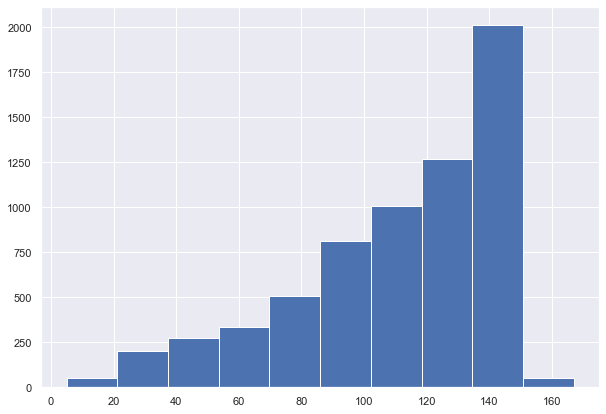

In [9]:
train['TweetText'].str.len().hist()

## Bar Plot of distribution of the balance of labels

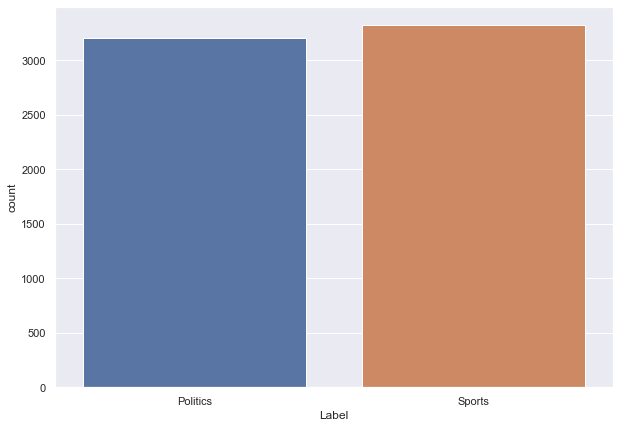

In [10]:
sns.countplot(x='Label', data=train)

## Bar Plot of distribution of stop words

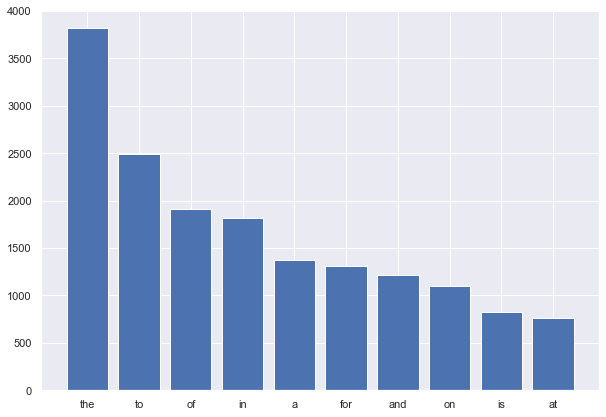

In [11]:
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10] 
    x,y = zip(*top)
    plt.bar(x, y)

plot_top_stopwords_barchart(train['TweetText'])

## Bar Plot of distribution of non stop words

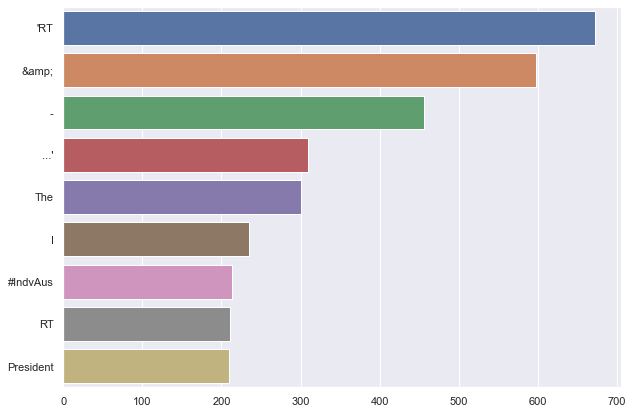

In [12]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y, y=x)

plot_top_non_stopwords_barchart(train['TweetText'])